---
#**Artificial Neural Network - Regression Problem**
Python Notebook ini dibuat untuk kegiatan AeroTraining - *Python Programming, Data Analysis and Machine Learning* dari **Keluarga Mahasiswa Teknik Penerbangan** oleh **Rafael Stevenson** 13617054.

---

# TensorFlow 2.0 and Keras

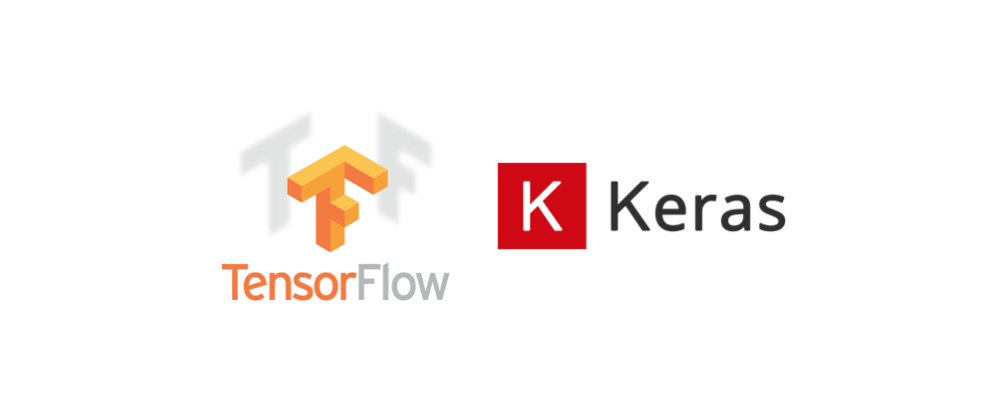

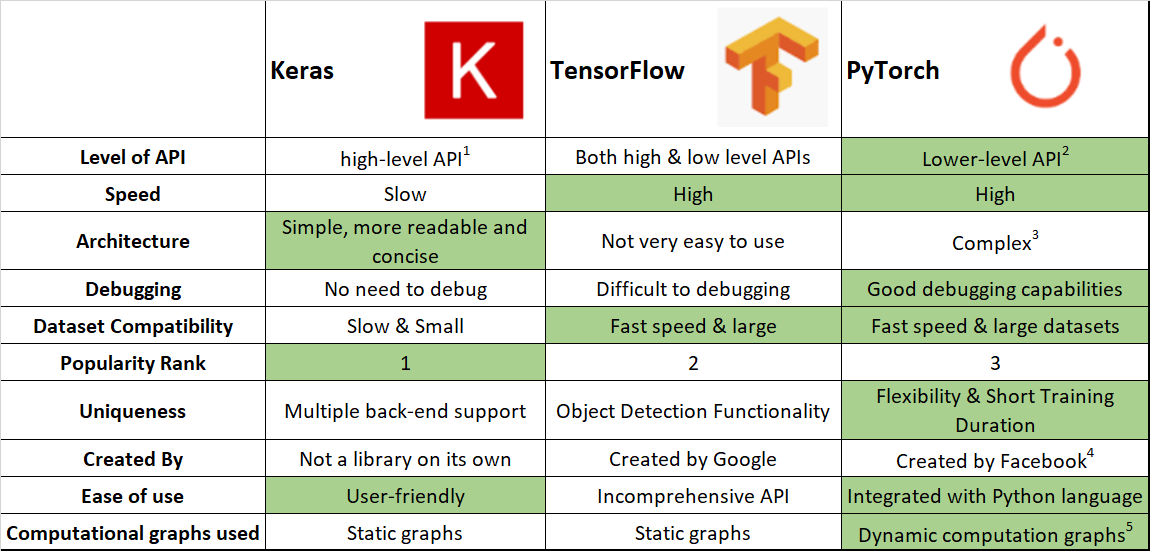

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/KMPN-workshop/dataset/kc_house_data.csv')
df

In [ ]:
#df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().transpose()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [ ]:
sns.countplot(df['bedrooms'])

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='rocket')

In [ ]:
df.sort_values('price',ascending=False).head(20)

In [ ]:
len(df)*(0.01)

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

### Feature Engineering from Date

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)

In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)

In [ ]:
sns.boxplot(x='year',y='price',data=df)

In [ ]:
sns.boxplot(x='month',y='price',data=df)

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

In [ ]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

In [ ]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

In [ ]:
df['sqft_basement'].value_counts()

## Scaling and Train Test Split

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Creating a Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
plt.grid()
plt.yscale("log")
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='validation loss')
plt.legend()
losses[['loss', 'val_loss']].plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [ ]:
X_test

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
explained_variance_score(y_test,predictions)

In [ ]:
df['price'].mean()

In [ ]:
df['price'].median()

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.values.reshape(6484, 1) - predictions

In [ ]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]
single_house

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

In [ ]:
model.predict(single_house)

In [ ]:
df.iloc[0]

#お疲れ様でした。